In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector


# Loading data and getting features overview

In [2]:
df = pd.read_csv('immo_data.csv')

In [3]:
#How many entries & features?

df.shape

(268850, 49)

In [4]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [5]:
#In which states are the properties located?

df['regio1'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

## Extract Berlin

In [6]:
# Filter the DataFrame for Berlin

df_berlin = df[df['regio1'] == 'Berlin']
df_berlin.shape

(10406, 49)

In [7]:
# Save the Berlin subset to a new CSV file
df_berlin.to_csv('berlin_dataset.csv', index=False)

In [8]:
df_berlin.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
45,Berlin,320.00,central_heating,NaN,NaN,False,True,10,4.99,NaN,...,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
61,Berlin,79.00,central_heating,ONE_YEAR_FREE,NaN,False,False,17,7.35,40.0,...,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,68.00,NaN,NaN,NaN,NaN,Oct19
77,Berlin,150.00,floor_heating,ONE_YEAR_FREE,NaN,True,True,15,6.60,40.0,...,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",NaN,NaN,NaN,NaN,NaN,Oct19
86,Berlin,228.78,floor_heating,NaN,NaN,False,True,2,8.63,NaN,...,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Balkon und 10m Terasse,NaN,NaN,NaN,NaN,NaN,Oct19
87,Berlin,147.08,district_heating,ONE_YEAR_FREE,NaN,True,True,9,7.56,40.0,...,Berlin,Tiergarten_Tiergarten,"In the """"Wasserstadt - Mitte"""" you can expect ...",Your spacious ground floor apartment is equipp...,73.54,B,2019.0,NaN,NaN,Feb20


In [9]:
df_berlin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10406 entries, 45 to 268829
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    10406 non-null  object 
 1   serviceCharge             10171 non-null  float64
 2   heatingType               8935 non-null   object 
 3   telekomTvOffer            8994 non-null   object 
 4   telekomHybridUploadSpeed  918 non-null    float64
 5   newlyConst                10406 non-null  bool   
 6   balcony                   10406 non-null  bool   
 7   picturecount              10406 non-null  int64  
 8   pricetrend                10381 non-null  float64
 9   telekomUploadSpeed        8993 non-null   float64
 10  totalRent                 9744 non-null   float64
 11  yearConstructed           8981 non-null   float64
 12  scoutId                   10406 non-null  int64  
 13  noParkSpaces              2013 non-null   float64
 14  firi

In [10]:
#Check on missing value 
#absolute value
df_berlin.isnull().sum().sort_values(ascending=False)

#relative value
df_berlin.isnull().sum().sort_values(ascending=False)/len(df_berlin)

telekomHybridUploadSpeed    0.911782
electricityKwhPrice         0.808284
electricityBasePrice        0.808284
noParkSpaces                0.806554
lastRefurbish               0.679416
energyEfficiencyClass       0.664713
petsAllowed                 0.464924
heatingCosts                0.458293
interiorQual                0.404382
thermalChar                 0.314722
numberOfFloors              0.300500
firingTypes                 0.219489
condition                   0.217951
houseNumber                 0.146742
streetPlain                 0.146742
heatingType                 0.141361
yearConstructed             0.136940
yearConstructedRange        0.136940
telekomUploadSpeed          0.135787
telekomTvOffer              0.135691
facilities                  0.127138
floor                       0.105708
typeOfFlat                  0.077263
description                 0.063809
totalRent                   0.063617
serviceCharge               0.022583
pricetrend                  0.002402
r

In [11]:
#drop duplicates
df_berlin.drop_duplicates().reset_index()

,index,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,45,Berlin,320.00,central_heating,NaN,NaN,False,True,10,4.99,...,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
1,61,Berlin,79.00,central_heating,ONE_YEAR_FREE,NaN,False,False,17,7.35,...,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Zusammengefasst bietet die Wohnung:\n+ Vollstä...,68.00,NaN,NaN,NaN,NaN,Oct19
2,77,Berlin,150.00,floor_heating,ONE_YEAR_FREE,NaN,True,True,15,6.60,...,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,"• sehr ruhig gelegen, trotz zentraler Lage, da...",NaN,NaN,NaN,NaN,NaN,Oct19
3,86,Berlin,228.78,floor_heating,NaN,NaN,False,True,2,8.63,...,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Balkon und 10m Terasse,NaN,NaN,NaN,NaN,NaN,Oct19
4,87,Berlin,147.08,district_heating,ONE_YEAR_FREE,NaN,True,True,9,7.56,...,Berlin,Tiergarten_Tiergarten,"In the """"Wasserstadt - Mitte"""" you can expect ...",Your spacious ground floor apartment is equipp...,73.54,B,2019.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,268716,Berlin,155.00,central_heating,ONE_YEAR_FREE,NaN,False,False,9,6.90,...,Berlin,Friedrichshagen_Köpenick,"1-Zimmer-Wohnung, DG links\n\n\nGröße: 57 m² ...","gefliestes Duschbad, wandhängendes WC,\nEinba...",30.00,NaN,NaN,NaN,NaN,May19
10402,268733,Berlin,100.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,10,7.59,...,Berlin,Spandau_Spandau,Extras:\n- Treppenhausreinigung\n- Hausmeister...,"Allgemein:\n- Kabel-TV, Grundversorgung\n- Vor...",NaN,NaN,NaN,90.76,0.1985,Sep18
10403,268746,Berlin,200.00,district_heating,ONE_YEAR_FREE,NaN,False,True,16,8.45,...,Berlin,Waidmannslust_Reinickendorf,Die hier angebotene Mietwohnung befindet sich ...,"- Erstbezug\n- 3,5 Zimmer\n- modernisiertes, g...",130.00,F,2019.0,NaN,NaN,May19
10404,268758,Berlin,100.00,district_heating,ONE_YEAR_FREE,NaN,True,False,13,6.14,...,Berlin,Charlottenburg_Charlottenburg,Bei dem Objekt handelt es sich um einen energi...,"Das Apartment ist voll möbliert, mit einer vol...",NaN,NaN,2019.0,NaN,NaN,Feb20


# Handling missing data (Berlin dataset)

## Dropping columns/features

In [12]:
# >80%  missing value is too high, let's drop these feature (but not 'noParkSpaces')

columns_to_drop = ['telekomHybridUploadSpeed','electricityKwhPrice','electricityBasePrice']
df_berlin_cleaned_1 = df_berlin.drop(columns=columns_to_drop)
df_berlin_cleaned_1.shape

(10406, 46)


**In the following additional columns will be dropped off. This is based on the columns description on:** https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany?select=immo_data.csv

- **telekomTvOffer**: Is payed TV included if so which offer
- **picturecount**: how many pictures were uploaded to the listing
- **pricetrend**: price trend as calculated by Immoscout
- **scoutId**: immoscout Id
- **geo_bln**: bundesland (state), same as regio1 (Berlin)
- **geo_krs**: district, above ZIP code (unique value is Berlin, so same as regio1)
- **street**: street name (Duplicated with streetPlain, which has clearer formating)
- **baseRentRange**: binned base rent, 1 to 9
- **noRoomsRange**: binned number of rooms, 1 to 5
- **livingSpaceRange**: binned living space, 1 to 7
- **yearConstructedRange**: binned
- **regio2**: District or Kreis, same as geo krs (unique value is Berlin, so same as regio1)
- **date**: time of scraping



In [51]:
df_berlin_cleaned_1['regio2'].unique()

array(['Berlin'], dtype=object)

In [13]:
df_berlin_cleaned_1.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish',
       'date'],
      dtype='object')

In [53]:
#Dropping off columns which are not relevant for our project based on column description

columns_to_drop_2 = ['telekomTvOffer','picturecount','pricetrend','scoutId','geo_bln','geo_krs','street'\
                     ,'baseRentRange','noRoomsRange','livingSpaceRange','livingSpaceRange','regio2','date','yearConstructedRange']
df_berlin_cleaned_2 = df_berlin_cleaned_1.drop(columns=columns_to_drop_2)
df_berlin_cleaned_2.shape

(10406, 33)

## Dropping rows/properties

In [15]:
#Overview of remaining features and its % missing value

df_berlin_cleaned_2.isnull().sum().sort_values(ascending=False)/len(df_berlin_cleaned_2)

noParkSpaces             0.806554
lastRefurbish            0.679416
energyEfficiencyClass    0.664713
petsAllowed              0.464924
heatingCosts             0.458293
interiorQual             0.404382
thermalChar              0.314722
numberOfFloors           0.300500
firingTypes              0.219489
condition                0.217951
streetPlain              0.146742
houseNumber              0.146742
heatingType              0.141361
yearConstructedRange     0.136940
yearConstructed          0.136940
telekomUploadSpeed       0.135787
facilities               0.127138
floor                    0.105708
typeOfFlat               0.077263
description              0.063809
totalRent                0.063617
serviceCharge            0.022583
regio3                   0.000000
garden                   0.000000
newlyConst               0.000000
lift                     0.000000
noRooms                  0.000000
geo_plz                  0.000000
balcony                  0.000000
livingSpace   

### Drop properties with missing address

**1527 Properties (15%) are missing street information**. Therefore, we should drop these properties.

Berlin total = 10.406 properties \
Berlin missing address = 1.527 properties\
Berlin with address = 8.879 properties

In [16]:
#number of properties missing street info

df_berlin_cleaned_2['streetPlain'].isnull().sum()

1527

In [17]:
#list of properties with missing address. We need to drop these!

berlin_properties_no_street = df_berlin_cleaned_2[df_berlin_cleaned_2['streetPlain'].isnull()] #.value_counts()
berlin_properties_no_street

,regio1,serviceCharge,heatingType,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,thermalChar,floor,numberOfFloors,garden,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish
286,Berlin,215.00,central_heating,False,True,10.0,1125.00,1890.0,NaN,gas,...,288.7,1.0,2.0,False,Französisch_Buchholz_Pankow,"Das Haus befindet sich an einer Hauptstraße, d...",Die Wohnung befindet sich in einem kleinen Meh...,118.0,NaN,1992.0
300,Berlin,450.00,floor_heating,True,True,40.0,2830.00,2018.0,NaN,district_heating,...,NaN,6.0,6.0,False,Charlottenburg_Charlottenburg,"Die hier angebotene, exklusive Penthouse ist T...","•\tGroßzügiger, lichtdurchfluteter Wohnbereich...",NaN,NaN,NaN
547,Berlin,250.00,central_heating,False,True,40.0,1125.00,1990.0,1.0,oil,...,100.8,1.0,3.0,True,Charlottenburg_Charlottenburg,Das Wohnhaus - erbaut etwa 1990 - liegt in Cha...,Die Wohnräume und die Diele verfügen über eine...,90.0,NaN,NaN
883,Berlin,155.00,central_heating,False,True,40.0,1766.00,1914.0,NaN,natural_gas_light,...,114.6,5.0,5.0,False,Friedrichshain_Friedrichshain,Suchen Sie eine 3-Zimmerwohnung in Friedrichsh...,NaN,111.0,NaN,NaN
1035,Berlin,225.00,central_heating,False,False,40.0,1215.00,1932.0,NaN,gas,...,70.8,2.0,3.0,False,Schmöckwitz_Köpenick,ERSTBEZUG NACH SANIERUNG!\n\nWir bieten Ihnen ...,- Erstbezug nach Sanierung\n- hochwertiges Ech...,NaN,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268086,Berlin,231.55,central_heating,False,True,40.0,794.35,1974.0,NaN,oil,...,NaN,0.0,1.0,False,Spandau_Spandau,Freistehendes Mehrfamilienhaus in ruhiger Seit...,Das Wohnzimmer ist mit Parkettboden ausgestatt...,NaN,NaN,2011.0
268321,Berlin,150.00,central_heating,False,True,40.0,1795.00,NaN,1.0,gas,...,90.0,5.0,5.0,False,Tiergarten_Tiergarten,Das imposante Wohn-und Geschäftsgebäude aus de...,Eine schöne Dachterrasse mit fast 10 m² realer...,100.0,NO_INFORMATION,2019.0
268470,Berlin,130.00,self_contained_central_heating,False,True,40.0,2895.00,1915.0,2.0,gas,...,137.6,2.0,5.0,False,Prenzlauer_Berg_Prenzlauer_Berg,"top sanierter Altbau, großzügige Innenhofsitua...",Der Fußboden ist mit einem Echtholz-Stabeichen...,70.0,NaN,2019.0
268491,Berlin,390.00,oil_heating,False,True,40.0,2600.00,1898.0,NaN,oil,...,NaN,NaN,NaN,False,Grunewald_Wilmersdorf,"• Die gemütliche, geschmackvoll möblierte, woh...",• Öl-Zentralheizung mit zentraler Warmwasserve...,NaN,NaN,2008.0


In [18]:
#Dropping properties without street info

df_berlin_cleaned_3 = df_berlin_cleaned_2.dropna(subset=['streetPlain'])
df_berlin_cleaned_3.shape

(8879, 34)

 ### Drop properties with missing price???
 <font color='red'>Around 6% of remaining properties do not have price. Shoud we drop them off???</font> 
 
tbd

In [19]:
df_berlin_cleaned_3.isnull().sum().sort_values(ascending=False)/len(df_berlin_cleaned_3)

noParkSpaces             0.815632
lastRefurbish            0.683185
energyEfficiencyClass    0.662237
petsAllowed              0.468634
heatingCosts             0.417051
interiorQual             0.411420
numberOfFloors           0.305552
thermalChar              0.300935
firingTypes              0.214776
condition                0.211623
heatingType              0.144048
telekomUploadSpeed       0.138304
yearConstructedRange     0.132785
yearConstructed          0.132785
facilities               0.111499
floor                    0.095732
typeOfFlat               0.073319
description              0.066787
totalRent                0.057439
serviceCharge            0.017457
garden                   0.000000
regio3                   0.000000
newlyConst               0.000000
lift                     0.000000
noRooms                  0.000000
geo_plz                  0.000000
streetPlain              0.000000
balcony                  0.000000
livingSpace              0.000000
houseNumber   

In [20]:
#...

In [ ]:
#to drop: firingTypes, thermalChar , interiorQual,

## Replacing missing data

### noParkSpaces

Around **80% of the properties** do not have information on number of parking spaces. To handle the 'noParkSpaces' column where 80% of the values are missing, we can **create an additional binary column 'ParkSpaces' indicating whether a property has parking spaces or not.***\

 <font color='red'>Should we drop the 'noParkSpaces'. Since number of parking may not be relevant but if the property has parking space or not???</font>
 
  DROP "noParkSpaces" AND KEEp 'ParkSpaces'
 
- 1 = property has parking space
- 0 = property has NO parking space

In [21]:
df_berlin_cleaned_3['noParkSpaces'].value_counts().sort_values(ascending=False)

1.0     1285
0.0      161
2.0       86
20.0      45
24.0      18
3.0        8
6.0        6
50.0       4
30.0       4
5.0        3
54.0       2
22.0       2
10.0       2
25.0       2
26.0       2
4.0        1
9.0        1
13.0       1
8.0        1
7.0        1
34.0       1
58.0       1
Name: noParkSpaces, dtype: int64

In [25]:
# Create a new binary column 'ParkSpaces'
df_berlin_cleaned_3['ParkSpaces'] = df_berlin_cleaned_3['noParkSpaces'].apply(lambda x: 1 if pd.notnull(x) else 0)

#Double check
df_berlin_cleaned_3[['noParkSpaces','ParkSpaces']]

/var/folders/80/5vb7sqfj76v55wcsnl47hht40000gn/T/ipykernel_8516/549599169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_berlin_cleaned_3['ParkSpaces'] = df_berlin_cleaned_3['noParkSpaces'].apply(lambda x: 1 if pd.notnull(x) else 0)


,noParkSpaces,ParkSpaces
45,1.0,1
61,NaN,0
77,1.0,1
86,NaN,0
87,NaN,0
...,...,...
268709,1.0,1
268733,NaN,0
268746,NaN,0
268758,NaN,0


### lastRefurbish

Around **70% of the properties** do not have information on year of last renovation.

<font color='red'>How to handle: Drop the whole column or replace???</font>

DROP since we have yearConstructed  & Condition

In [54]:
df_berlin_cleaned_3['lastRefurbish'].value_counts()

2019.0    1161
2018.0     662
2017.0     223
2016.0     157
2015.0     114
2014.0      97
2020.0      95
2013.0      48
2012.0      39
2011.0      30
2005.0      28
2010.0      24
2000.0      16
2008.0      14
2002.0      13
2009.0      13
2003.0      12
2007.0      12
1995.0       8
1999.0       8
2004.0       7
2006.0       6
1997.0       6
2001.0       5
1998.0       4
1990.0       4
1996.0       2
1903.0       1
1984.0       1
1991.0       1
1978.0       1
1954.0       1
Name: lastRefurbish, dtype: int64

### energyEfficiencyClass

Around **70% of the properties** do not have information on energy efficiency class.

<font color='red'>How to handle: Drop the whole column or replace???</font>

DROP: we have engerny costs

In [30]:
df_berlin_cleaned_3['energyEfficiencyClass'].value_counts()

B                 668
C                 599
NO_INFORMATION    513
D                 434
E                 289
A                 203
F                 173
A_PLUS             72
G                  39
H                   9
Name: energyEfficiencyClass, dtype: int64

### petsAllowed

Around **50% of the properties** do not have information on energy efficiency class.

<font color='red'>How to handle: Drop the whole column or replace???</font>

if missing = NOOO

In [33]:
df_berlin_cleaned_3['petsAllowed'].value_counts()


negotiable    3490
no             994
yes            234
Name: petsAllowed, dtype: int64

In [55]:
#fill warm miete: ratio kalt<=> totalrent

# Creating Full Address column for API call

Create a new column **'fullAddress'** that serves as **input for an API Overpass** call. We need to concatenate the values from the houseNumber, streetPlain, geo_plz, regio1. Additionally we need to include the country in the address string. \
PS: country column is not yet in the dataset

1. Replace '_' in the streetPlain by ' '
2. Merge houseNumber, streetPlain, geo_pl and regio1, country

DROP houseNumber, streetPlain, geo_plz, regio1. & KEEP fullAddress only


In [39]:
#First: Remove underscores from 'streetPlain' column
df_berlin_cleaned_3['streetPlain'] = df_berlin_cleaned_3['streetPlain'].str.replace('_', ' ')

/var/folders/80/5vb7sqfj76v55wcsnl47hht40000gn/T/ipykernel_8516/349605596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_berlin_cleaned_3['streetPlain'] = df_berlin_cleaned_3['streetPlain'].str.replace('_', ' ')


In [40]:
#Second: Create the new column for Overpass API input including the country
df_berlin_cleaned_3['fullAddress'] = df_berlin_cleaned_3.apply(
    lambda row: f"{row['streetPlain']} {row['houseNumber']}, {row['geo_plz']} {row['regio1']}, Germany", axis=1)
df_berlin_cleaned_3[['streetPlain','houseNumber','geo_plz', 'regio1','fullAddress']]

/var/folders/80/5vb7sqfj76v55wcsnl47hht40000gn/T/ipykernel_8516/4180841554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_berlin_cleaned_3['fullAddress'] = df_berlin_cleaned_3.apply(


,streetPlain,houseNumber,geo_plz,regio1,fullAddress
45,Metropolitan Park,63,13591,Berlin,"Metropolitan Park 63, 13591 Berlin, Germany"
61,Börnestraße,11,13086,Berlin,"Börnestraße 11, 13086 Berlin, Germany"
77,Stallschreiberstraße,27,10179,Berlin,"Stallschreiberstraße 27, 10179 Berlin, Germany"
86,Hallesche Straße,5a,10963,Berlin,"Hallesche Straße 5a, 10963 Berlin, Germany"
87,Heidestraße,19,10557,Berlin,"Heidestraße 19, 10557 Berlin, Germany"
...,...,...,...,...,...
268709,Wartburgstraße,53a,10823,Berlin,"Wartburgstraße 53a, 10823 Berlin, Germany"
268733,Brüderstraße,22,13595,Berlin,"Brüderstraße 22, 13595 Berlin, Germany"
268746,Todtnauer Zeile,3,13469,Berlin,"Todtnauer Zeile 3, 13469 Berlin, Germany"
268758,Leibnizstr.,85,10625,Berlin,"Leibnizstr. 85, 10625 Berlin, Germany"


In [41]:
#Let's check on the status of total columns
df_berlin_cleaned_3.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'houseNumber', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'streetPlain', 'lift', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'garden', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'ParkSpaces', 'fullAddress'],
      dtype='object')

# Creating Pipeline

1. Define the numerical and categorical features
2. SimpleImputer & Scalling the Data


In [45]:
df_berlin_cleaned_3.dtypes

regio1                    object
serviceCharge            float64
heatingType               object
newlyConst                  bool
balcony                     bool
telekomUploadSpeed       float64
totalRent                float64
yearConstructed          float64
noParkSpaces             float64
firingTypes               object
hasKitchen                  bool
cellar                      bool
yearConstructedRange     float64
baseRent                 float64
houseNumber               object
livingSpace              float64
condition                 object
interiorQual              object
petsAllowed               object
streetPlain               object
lift                        bool
typeOfFlat                object
geo_plz                    int64
noRooms                  float64
thermalChar              float64
floor                    float64
numberOfFloors           float64
garden                      bool
regio3                    object
description               object
facilities

In [ ]:
#Define the numerical and categorical features
num_col = make_column_selector(dtype_include=['float64'])
cat_col = make_column_selector(dtype_include=['object','bool'])


Handling missing data:
- SimpleImputer, you can replace missing values with a strategy of your choice (e.g. median, mean, mode, most frequent, ...)

Scalling Data
- StandardScaler ("Standardizing"): if normal distribution and no outliers
- MinMaxScaler ("Normalizing"): if column has neither a Gaussian distribution, nor outliers
- RobustScaler: if many outliers 

In [ ]:
#
num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
cat_transformer = OneHotEncoder()


In [43]:
df_berlin_cleaned_3.dtype()

AttributeError: 'DataFrame' object has no attribute 'dtype'

<AxesSubplot:>

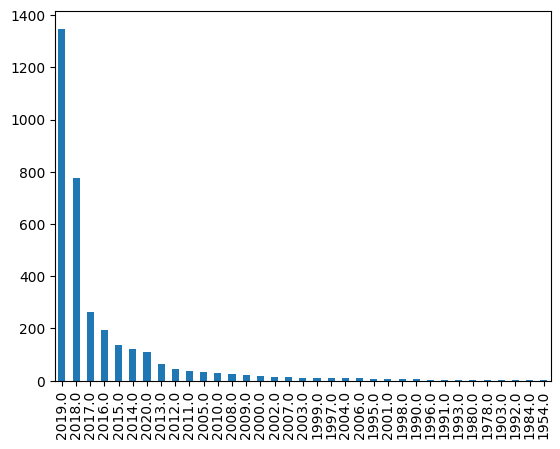

In [24]:
#lastRefurbish describes year of last renovation. 
df_berlin_cleaned_1['lastRefurbish'].value_counts().plot(kind='bar')

# Visual Exploration